# Projeto 2 de Ciência dos Dados

Integrantes:
- Barbara Martins Damasceno
- Daniel Costa Delattre 
- Guilherme Augusto Carvalho

## Objetivo 
**Pergunta que queremos responder**
Qual é o preço de uma casa de acordo com suas características?

Carregando algumas bibliotecas:

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os, csv, string, re
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


In [32]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    '''
    X: coluna(s) do DataFrame que serão utilizadas como variável(is) preditoras/explicativas (independente(s))
    Y: coluna do DataFrame que será utilizada como variável resposta (dependente)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

Verificando o diretório

In [19]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Documents\2 Semestre ENG\Ciência dos Dados\house-prediction-cdados


Carregando a base de dados de teste e de treino:

In [20]:
dados_base = pd.read_csv('kc_house_data.csv')
#dadosteste = pd.read_csv('t1.xlsx', sheet_name='Teste')

Verificando se não existe linhas sem dados/informação

In [21]:
np.sum(dados_base.isnull())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
dados_base.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
dados_base.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


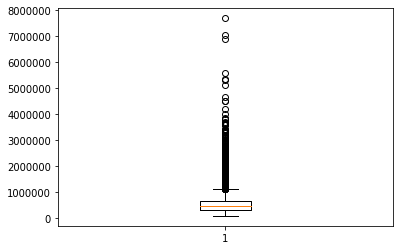

In [46]:
plt.boxplot(dados_base['price'])
plt.show()

Text(0, 0.5, 'Número de banheiros')

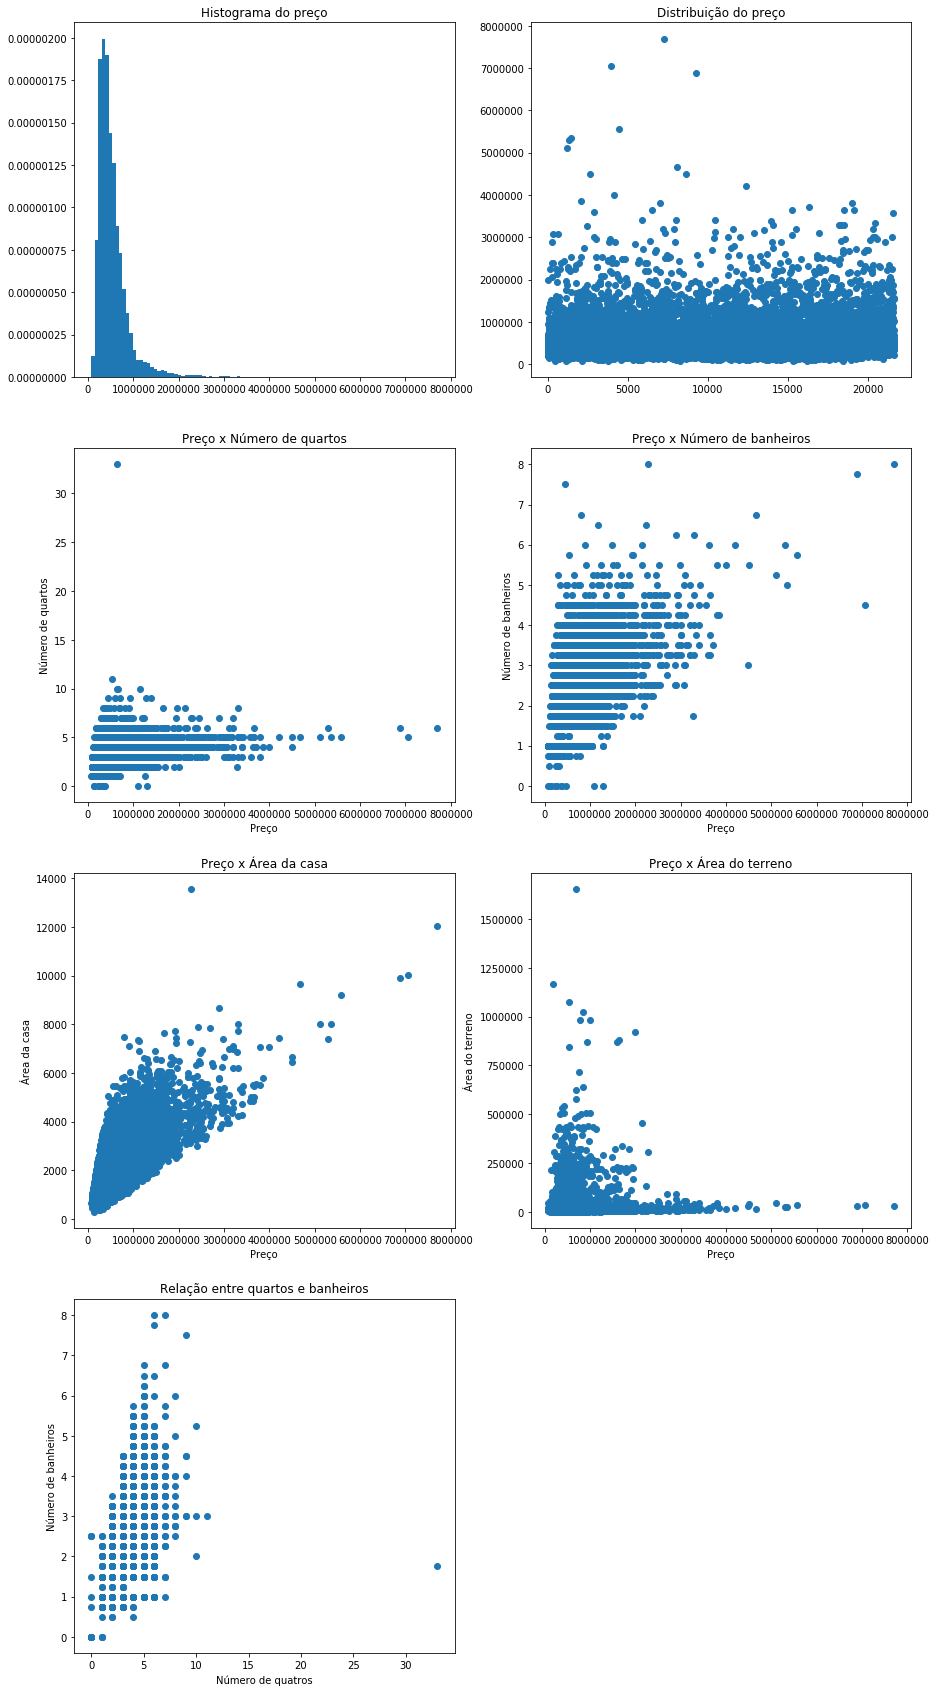

In [44]:
#Plotando as informações em gráficos
fig = plt.figure(figsize=(15, 30))

plt.subplot(4, 2, 1)
#plt.hist(dados_base.price,bins=100,density=True)
plt.title('Histograma do preço')

plt.subplot(4, 2, 2)
faixa_aleatoria = np.arange(0,len(dados.price),1)
plt.scatter(faixa_aleatoria,dados_base.price)
plt.title('Distribuição do preço')

plt.subplot(4,2,3)
plt.scatter(dados_base.price, dados_base.bedrooms)
plt.title('Preço x Número de quartos')
plt.xlabel('Preço')
plt.ylabel('Número de quartos')

plt.subplot(4,2,4)
plt.scatter(dados_base.price, dados_base.bathrooms)
plt.title('Preço x Número de banheiros')
plt.xlabel('Preço')
plt.ylabel('Número de banheiros')

plt.subplot(4,2,5)
plt.scatter(dados_base.price, dados_base.sqft_living)
plt.title('Preço x Área da casa')
plt.xlabel('Preço')
plt.ylabel('Área da casa')

plt.subplot(4,2,6)
plt.scatter(dados_base.price, dados_base.sqft_lot)
plt.title('Preço x Área do terreno')
plt.xlabel('Preço')
plt.ylabel("Área do terreno")

plt.subplot(4,2,7)
plt.scatter(dados.bedrooms, dados.bathrooms)
plt.title('Relação entre quartos e banheiros')
plt.xlabel('Número de quatros')
plt.ylabel('Número de banheiros')



In [36]:
X = dados[['bedrooms', 'bathrooms', 'sqft_living','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long']]
Y = dados['price']

In [37]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3855.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        14:56:38   Log-Likelihood:            -2.9464e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21599   BIC:                         5.894e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.049e+06   2.81e+06      2.865      0.004    2.54e+06    1.36e+07
bedrooms       -3.53e+04   1886.190    -18.715      0.000    -3.9e+04   -3.16e+04
bathrooms      4.233e+04   3136.820     13.494      0.000    3.62e+04    4.85e+04
sqft_living     113.7205      2.091     54.390      0.000     109.622     117.819
waterfront     5.794e+05   1.74e+04     33.347      0.000    5.45e+05    6.13e+05
view           5.473e+04   2114.207     25.886      0.000    5.06e+04    5.89e+04
condition      2.547e+04   2349.490     10.842      0.000    2.09e+04    3.01e+04
grade          1.001e+05   2062.081     48.545      0.000    9.61e+04    1.04e+05
sqft_above       75.3214      1.993     37.785      0.000      71.414      79.229
sqft_basement    38.3980      2.405     15.963      0.000      33.683      43.113
yr_built      -2609.3168     70.787    -36.861      0.000   -2748.065   -2470.569
yr_renovated     18.7084      3.649      5.127      0.000      11.556      25.861
zipcode        -598.2685     32.704    -18.293      0.000    -662.371    -534.166
lat            6.097e+05   1.07e+04     57.140      0.000    5.89e+05    6.31e+05
long          -2.135e+05   1.27e+04    -16.845      0.000   -2.38e+05   -1.89e+05
==============================================================================
Omnibus:                    18114.234   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1751225.851
Skew:                           3.495   Prob(JB):                         0.00
Kurtosis:                      46.541   Cond. No.                     3.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

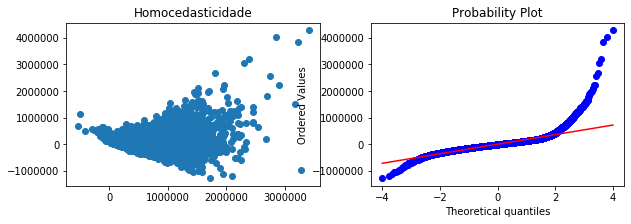

In [69]:
resultado_reg = results.resid

y_predict = results.predict(sm.add_constant(X))

fig1 = plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(y_predict,resultado_reg)
plt.title("Homocedasticidade")

plt.subplot(1,2,2)
stats.probplot(resultado_reg,dist='norm',plot=plt)
plt.show()